In [33]:
import numpy as np
import random
#import multiprocessing
from joblib import Parallel, delayed
import matplotlib.pyplot as plt


def hardselect(M,n,p):
    size = int(np.floor(n*p))
    v = np.array(range(0,n))
    degree_seq = np.array(np.sum(M, axis = 1)[0:n])
    nontaboo_degree_max = np.sort(degree_seq)[(n-1-size)]
    taboo = degree_seq[degree_seq > nontaboo_degree_max]
    return taboo
    

def softselect(M,n,p):
    size = int(np.floor(n*p))
    v = np.array(range(0,n))
    grand_prob = np.sum(M, axis = 1)
    prob_vec = grand_prob[0:n]/np.sum(grand_prob[0:n])
    taboo = np.random.choice(v, size = size, replace = False, p = prob_vec)
    return taboo

def simulate_graph_maximal(N,p):
    M = np.zeros(shape = (N,N), dtype = int)
    M[0,1] = 1; M[1,0] = 1
    for i in range(2,N):
        taboo = softselect(M,i, p)
        v = range(0, i)
        nontaboo = np.setxor1d(v, taboo, assume_unique=True)
        nontaboo_incidence = M[nontaboo]
        prob_vec = np.sum(nontaboo_incidence, axis = 1)
        edge_end = random.choices(nontaboo, weights = prob_vec, k = 1)
        M[i, edge_end] = 1
        M[edge_end, i] = 1
    
    #deg_seq = np.sum(M, axis = 1)
    max_deg = max(np.sum(M, axis = 1))

    return max_deg

def simulate_graph_seq(N,p,k):
    M = np.zeros(shape = (N,N), dtype = int)
    M[0,1] = 1; M[1,0] = 1
    for i in range(2,N):
        taboo = hardselect(M,i, p)
        v = range(0, i)
        nontaboo = np.setxor1d(v, taboo, assume_unique=True)
        nontaboo_incidence = M[nontaboo]
        prob_vec = np.sum(nontaboo_incidence, axis = 1)
        edge_end = random.choices(nontaboo, weights = prob_vec, k = 1)
        M[i, edge_end] = 1
        M[edge_end, i] = 1
    
    deg_seq = np.sum(M, axis = 1)
    number_of_vertex = deg_seq.count(k)

    return number_of_vertex

def maximal_plot(N,p,S):
    #num_cores = multiprocessing.cpu_count()
    inputs = range(0,S)

    mylist = []
    mylist = Parallel(n_jobs = -1)(delayed(simulate_graph_maximal)(N,p) for i in inputs)
    fig, ax = plt.subplots(figsize =(10, 7))
    ax.hist(mylist)
    filename = f"Graph of size {N} and Number of iteration {S}"
    plt.title(filename)
    plt.savefig(fname = filename, dpi = 800)
    return np.mean(mylist), np.var(mylist)

CPU times: user 4.56 s, sys: 575 ms, total: 5.14 s
Wall time: 8.66 s


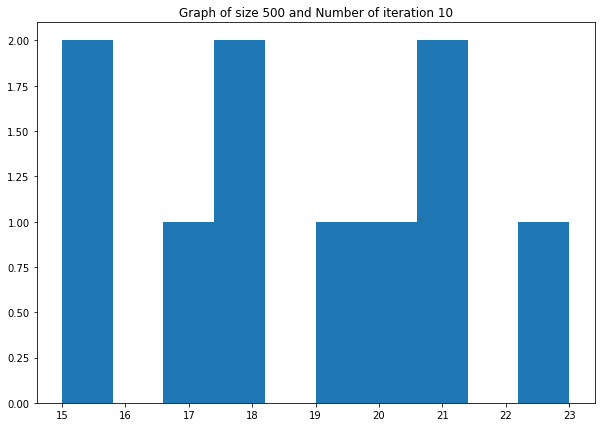

In [34]:
%%time
x = maximal_plot(500, .1, 10)

In [31]:
x

(13.7, 8.25)

In [8]:
v = [1,2,3,4,5,6]
np.var(v)

2.9166666666666665

In [4]:
a = [2,5,1,7]
np.sort(a)

array([1, 2, 5, 7])

In [14]:
a[-2]

1

In [32]:
?plt.savefig